In [1]:
%matplotlib inline

In [2]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *

In [4]:
datos = genfromtxt('ej-ajuste-03.txt')
x = datos[:,0]
y = datos[:,1]

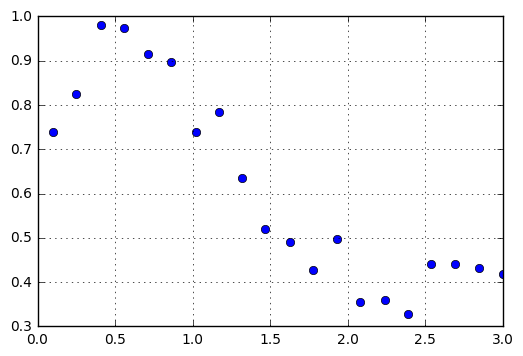

In [5]:
# gráfico rápido para ver cómo es la tendencia
plot(x,y,'o')
grid()

In [6]:
m=2

In [7]:
# crea las matrices que usaremos, llenas de ceros
M=zeros((m+1,m+1))
b=zeros(m+1)

In [8]:
b

array([ 0.,  0.,  0.])

In [9]:
# Matriz de coeficientes
for i in range(m+1):
    for j in range(m+1):
        M[i,j] = sum(x**(i+j))

In [10]:
# vector de coeficientes
for i in range(m+1):
    b[i] = sum(y*x**i)

In [11]:
# calcula solución de constantes a0, a1, ...
a = solve(M,b)

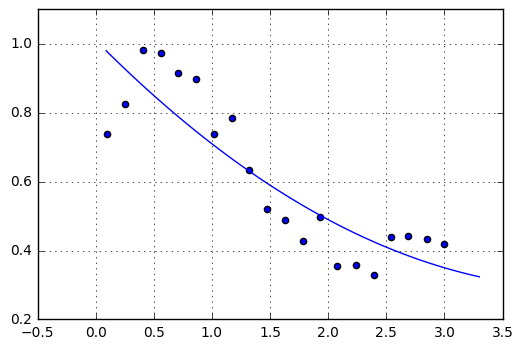

In [12]:
xx = linspace(0.9*min(x),1.1*max(x),100)
yy = a[0]+a[1]*xx+a[2]*xx**2
scatter(x,y)
plot(xx,yy)
#xlim(0.9*min(x),1.1*max(x))
grid()

In [13]:
# calcula coeficiente de correlación
st = sum((y-mean(y))**2)
sr = sum((y-(a[0]+a[1]*x+a[2]*x**2))**2)
r2 = (st-sr)/st

In [14]:
for i in range(3): print('a'+str(i)+' = '+str(a[i]))
print('r**2 = '+str(r2))

a0 = 1.01051717933
a1 = -0.340841719957
a2 = 0.0402309212165
r**2 = 0.770992287555


# Ahora comparamos con la función `polyfit` de numpy

In [15]:
#help(polyfit)

In [16]:
aa = polyfit(x,y,2)

Note que polyfit ordena los coeficientes de 'mayor a menor' respecto al exponente correspondiente

In [17]:
a, aa

(array([ 1.01051718, -0.34084172,  0.04023092]),
 array([ 0.04023092, -0.34084172,  1.01051718]))

Como vemos, salvo el orden, se obtienen los mismos coeficientes. Para evaluar el polinomio podemos usar la función *polyval*

In [18]:
polyval(aa,10)

1.6251921014108042

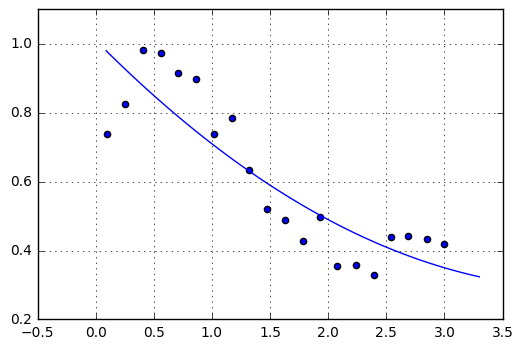

In [19]:
scatter(x,y)
plot(xx,polyval(aa,xx))
grid()

In [20]:
# calcula coeficiente de correlación usando polyval
st = sum((y-mean(y))**2)
sr = sum((y-polyval(aa,x))**2)
r2 = (st-sr)/st

In [21]:
print aa
print('r2 = '+str(r2))

[ 0.04023092 -0.34084172  1.01051718]
r2 = 0.770992287555


Podemos calcular y graficar los residuos:

In [22]:
ep = y-polyval(aa,x)
print(ep)

[-0.23883532 -0.10182118  0.10346511  0.14173777  0.12620003  0.14985191
  0.03428512  0.11819552  0.00429553 -0.07641485 -0.07183471 -0.10328657
 -0.00554882 -0.12062146 -0.0898944  -0.09770851  0.03566698  0.05623208
  0.06710606  0.06892969]


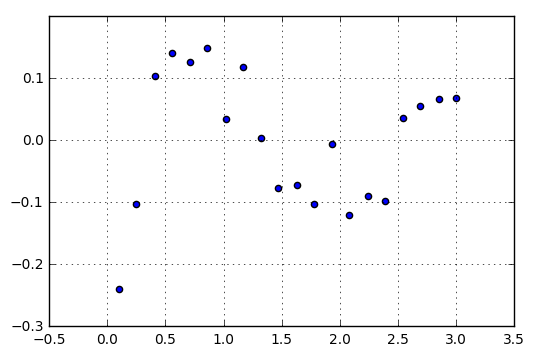

In [23]:
scatter(x,ep)
grid()

Y hacer un histograma de sus valores:

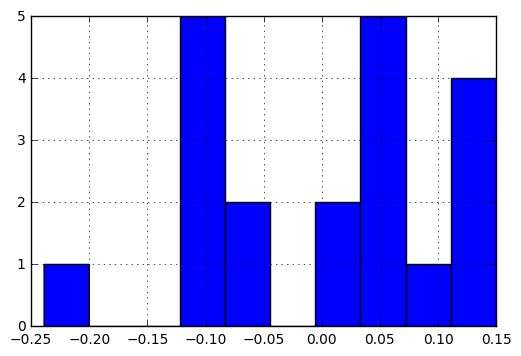

In [24]:
hist(ep)[2]
grid()